Question 1: What is the difference between K-Means and Hierarchical Clustering? Provide a use case for each.

| Aspect             | K-Means                                  | Hierarchical Clustering      |
| ------------------ | ---------------------------------------- | ---------------------------- |
| Approach           | Partition-based                          | Tree-based                   |
| Number of clusters | Must be predefined (K)                   | Not required initially       |
| Scalability        | Fast, works well on large datasets       | Slower for large datasets    |
| Output             | Flat clusters                            | Dendrogram (tree structure)  |
| Sensitivity        | Sensitive to initial centroids & scaling | Sensitive to distance metric |


Question 2: Explain the purpose of the Silhouette Score in evaluating clustering algorithms.

 - The Silhouette Score measures how well data points fit within their assigned cluster compared to other clusters.

Range: −1 to +1

+1: Well-clustered

0: Overlapping clusters

−1: Incorrect clustering

**Why it’s used**:

To evaluate cluster quality

To compare different clustering models or values of K

Question 3: What are the core parameters of DBSCAN, and how do they influence the clustering process?

| Parameter     | Description                      | Effect                              |
| ------------- | -------------------------------- | ----------------------------------- |
| `eps`         | Neighborhood radius              | Larger eps → fewer, larger clusters |
| `min_samples` | Minimum points to form a cluster | Higher → more noise points          |
| `metric`      | Distance measure                 | Affects neighborhood calculation    |


Question 4: Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?

 - Clustering algorithms rely on distance calculations.

Without scaling:

Features with large ranges dominate distance

Leads to incorrect clusters

**Algorithms affected:**

✔ K-Means

✔ DBSCAN

✔ Hierarchical

**Common scalers:**

StandardScaler

MinMaxScaler

Question 5: What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?
Dataset: Use make_blobs, make_moons, and sklearn.datasets.load_wine() as specified.

 - The Elbow Method plots:

X-axis → Number of clusters (K)

Y-axis → WCSS (Within-Cluster Sum of Squares)

The “elbow point” where improvement slows indicates the optimal K.

**Purpose:**

Helps avoid under- or over-clustering.

Question 6: Generate synthetic data using make_blobs(n_samples=300, centers=4), apply KMeans clustering, and visualize the results with cluster centers.

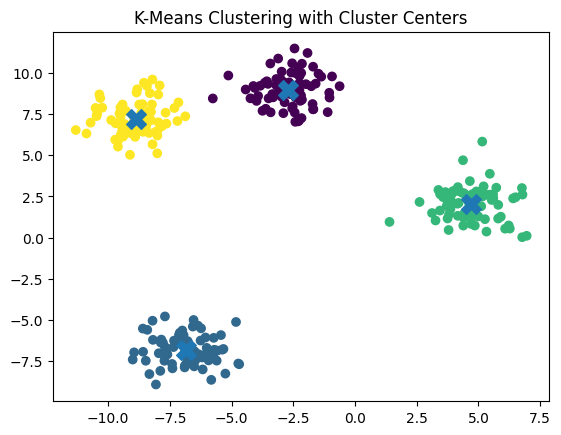

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=200, marker='X')
plt.title("K-Means Clustering with Cluster Centers")
plt.show()


Question 7: Load the Wine dataset, apply StandardScaler , and then train a DBSCAN model. Print the number of clusters found (excluding noise).

In [2]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

wine = load_wine()
X = wine.data

X_scaled = StandardScaler().fit_transform(X)

dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters:", n_clusters)


Number of clusters: 0


Question 8: Generate moon-shaped synthetic data using make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in the plot.

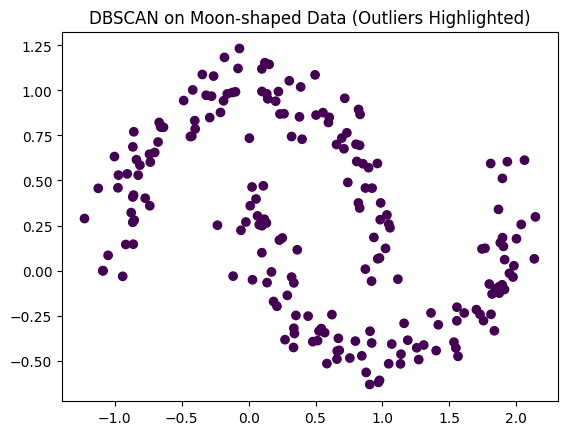

In [3]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, _ = make_moons(n_samples=200, noise=0.1, random_state=42)

dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("DBSCAN on Moon-shaped Data (Outliers Highlighted)")
plt.show()


Question 9: Load the Wine dataset, reduce it to 2D using PCA, then apply Agglomerative Clustering and visualize the result in 2D with a scatter plot.

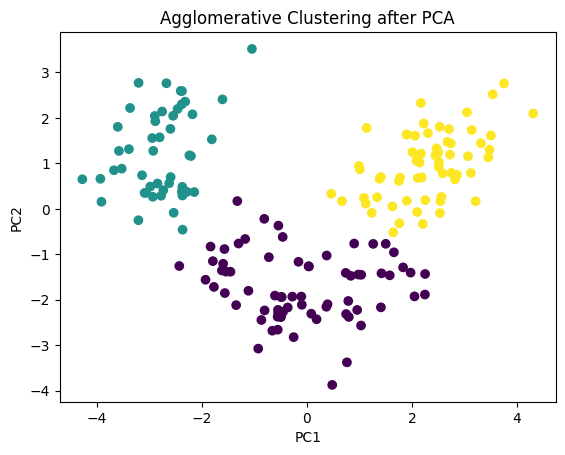

In [4]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.title("Agglomerative Clustering after PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


Question 10: You are working as a data analyst at an e-commerce company. The marketing team wants to segment customers based on their purchasing behavior to run targeted promotions. The dataset contains customer demographics and their product purchase history across categories.

 Describe your real-world data science workflow using clustering:

● Which clustering algorithm(s) would you use and why?

● How would you preprocess the data (missing values, scaling)?

● How would you determine the number of clusters?

● How would the marketing team benefit from your clustering analysis?


 - **Clustering Algorithm Choice**

K-Means: Large dataset, clear segmentation

DBSCAN: Detect outliers & irregular buying patterns

Hierarchical: Small datasets & business interpretability

 - **Data Preprocessing**

Handle missing values (mean/median or mode)

Encode categorical variables (One-Hot Encoding)

Scale features using StandardScaler

 - **Determining Number of Clusters**

Elbow Method

Silhouette Score

Business validation with marketing team